In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Using callbacks to stop training when it reaches a specific value for some metric
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    #Check the accuracy
    if(logs.get('accuracy') >= 0.99): # Experiment with changing this value
      #Stop if Threshold is met
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
#Load the MNIST dataset
mnist = tf.keras.datasets.mnist

In [ ]:
#Load the training and test split of the MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Label: 5

Image Pixel Array:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 

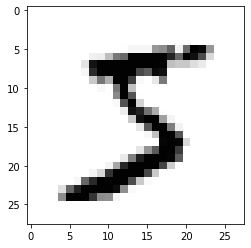

In [ ]:
index = 0

#set the number of characters per row when printing
np.set_printoptions(linewidth = 320)

#print the label and image
print(f'Label: {y_train[index]}')
print(f'\nImage Pixel Array:\n {x_train[index]}')

#visualizing the image
plt.imshow(x_train[index], cmap='Greys')

In [ ]:
#Normalize the pixel values of the train and test image
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
#Define the layers of model
L0 = tf.keras.layers.Flatten(input_shape=(28, 28)) #shape of data
L1 = tf.keras.layers.Dense(512, activation=tf.nn.relu) #detect the rule between L0 and L2
L2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax) #shape of classes

In [ ]:
#Building the Classification model
model = tf.keras.models.Sequential([L0,L1,L2])

In [ ]:
#Classifications
classifications = model.predict(x_test)
print(classifications[0])
print(y_test[0])

[0.14899786 0.12764548 0.05256787 0.0630774  0.19100806 0.05283697 0.0797252  0.08740735 0.09416398 0.10256976]
7


**Not Necessary Code:**
you can remove it if you want!

In [ ]:
#Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

#Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

#Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

#Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [ ]:
#Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

**Train The Model**

In [ ]:
#Instantiate class
callbacks = myCallback()
history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2007 - accuracy: 0.9408
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0793 - accuracy: 0.9759
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0514 - accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0370 - accuracy: 0.9883
Epoch 5/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0262 - accuracy: 0.9913
Reached 95% accuracy so cancelling training!
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0262 - accuracy: 0.9913


In [ ]:
#Model History Keys
history.history.keys()

dict_keys(['loss', 'accuracy'])

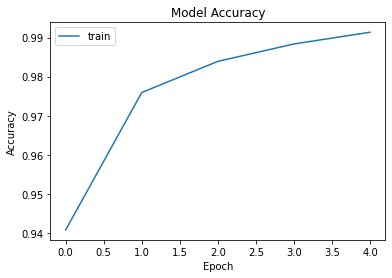

In [ ]:
#Plot Accuracy Curve 
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

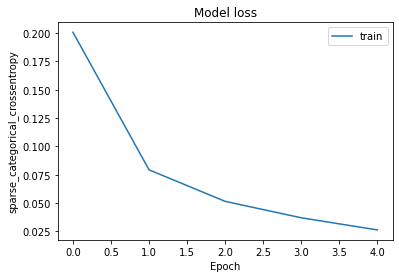

In [ ]:
#Plot Loss Curve 
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('sparse_categorical_crossentropy')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
#Evaluate the model on unseen data
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0734 - accuracy: 0.9787


[0.07337496429681778, 0.9786999821662903]